# DAPL ML Zero - Getting Started with Machine Learning 
## Regression

Author: Spencer Bertsch  

The purpose of this notebook is to show the different types of supervised learning and a few very simple implementations of solutions. 

All data used in this notebook came from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets.php)

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import optimize
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

Remember if your environment doesn't have a package that you need, that's ok! You can install it right through your jupyter notebook by running **! pip install package_name** in a code cell. 

# Least Squares Estimation

This part of the notebook is adapted from [this python numerical methods textbook by Kong, Siauw, and Bayen](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html). Feel free to check out their book for more great examples of numerical methods in python! 

- The first step is to generate our x and y vectors: 

In [2]:
# generate x and y
x = np.linspace(0, 1, 101)
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [3]:
y = 1 + x + x * np.random.random(len(x))
y

array([1.        , 1.01605439, 1.02256496, 1.04707142, 1.07437125,
       1.08675167, 1.07718683, 1.1370713 , 1.13841865, 1.12040362,
       1.16886656, 1.1763371 , 1.17502514, 1.20320333, 1.20295743,
       1.23829527, 1.2599995 , 1.304412  , 1.22007493, 1.2002004 ,
       1.27150543, 1.2344042 , 1.39408194, 1.43067915, 1.28227459,
       1.26104738, 1.3580863 , 1.31314926, 1.50701058, 1.33631358,
       1.37173882, 1.49398623, 1.35498288, 1.3335647 , 1.38786233,
       1.52631793, 1.49073832, 1.48388496, 1.38034482, 1.73300864,
       1.40606803, 1.58346591, 1.61180145, 1.51268343, 1.67054893,
       1.51196492, 1.52746057, 1.65788775, 1.89514876, 1.74944485,
       1.54336079, 1.59917778, 1.97835352, 1.5447921 , 1.95482558,
       1.60541975, 1.99032169, 1.88848919, 1.76099425, 1.69799741,
       1.77357607, 1.74763041, 1.90862127, 2.08684187, 1.73452417,
       2.0319693 , 1.85551869, 1.82158638, 2.02279502, 2.35392548,
       1.95424422, 2.05879965, 2.00122313, 1.79398479, 2.14263

Before we move on, let's visualize our data using a scatter plot to see what we're modeling:

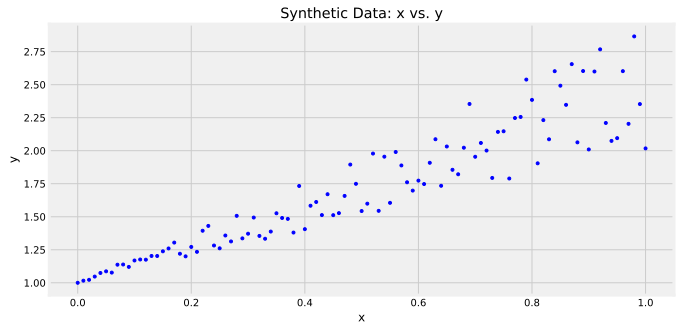

In [4]:
plt.figure(figsize = (10,5))
plt.plot(x, y, '.', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data: x vs. y')
plt.show()

Great - so now that we have generated some synhetic data, let's create a univariate regression model. 

In [5]:
# assemble matrix X
X = np.vstack([x, np.ones(len(x))]).T
X[:5]

array([[0.  , 1.  ],
       [0.01, 1.  ],
       [0.02, 1.  ],
       [0.03, 1.  ],
       [0.04, 1.  ]])

Remember why we need to add the vector of 1 values to our x vector to create a $2 \times n$ matrix called $A$? See lecture slides for more info! Hint: remember the $\beta_0$ parameter.

Now we can create the **x_transpose_x** matrix:

In [6]:
x_transpose_x = np.dot(X.T, X)
x_transpose_x

array([[ 33.835,  50.5  ],
       [ 50.5  , 101.   ]])

And we can take the inverse of that matrix: 

In [7]:
x_transpose_x_inverse = np.linalg.inv(x_transpose_x)
x_transpose_x_inverse

array([[ 0.11648224, -0.05824112],
       [-0.05824112,  0.03902155]])

Now we can create the **x_transpose_y** matrix:

In [8]:
x_transpose_y = np.dot(X.T, y)
x_transpose_y

array([ 99.80604292, 173.94069591])

And finally we can find: **x_transpose_x_inverse * x_transpose_y**:

Remember here our goal is: $\beta_0, \beta_1 = (X^TX)^{-1} \cdot (X^T Y)$

In [9]:
# estimate the parameters here! 
params = np.dot(x_transpose_x_inverse, x_transpose_y)
print(params)

[1.49513046 0.97461988]


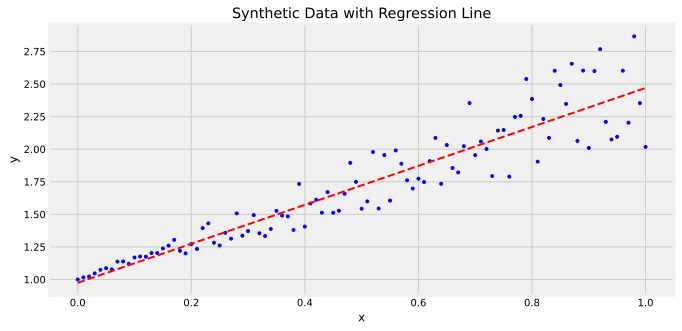

In [10]:
plt.figure(figsize = (10,5))
plt.plot(x, y, 'b.')
plt.plot(x, params[0]*x + params[1], 'r--', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data with Regression Line')
plt.show()

Great work! Now let's move onto an example using real data.

# Regression Example using Real World Data: Real Estate Valuation

The goal here is to train a model how to predict a **continuous value** that represents the home value based on several predictor variables. 

[Data source.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

In [11]:
p: str = os.path.abspath('')
base_path: str = p + '/data/'
print(f'Your data files should be in the following directory: {base_path}')

Your data files should be in the following directory: /Users/spencerbertsch/Desktop/dev/DAPL/ML_Intro/data/


Step 1: Read the data into memory using pandas

In [12]:
df_path: str = base_path + 'real_estate_valuation.xlsx'
df: pd.DataFrame = pd.read_excel(df_path, header=[0])
df.tail(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [13]:
X = df.iloc[:, 1 : -1]  # <-- we do this to leave out the first column (id column so we don't need it) and the last column (response)
y = df['Y house price of unit area']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Create linear regression object
clf = LinearRegression()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

In [16]:
# We can now examine the betas (coefficients) of our multivariate regression model 
print(f"Coefficients: {clf.coef_}")
print(f"Mean squared error: {round(mean_squared_error(y_test, y_pred), 3)}")
print(f"R Squared: {round(r2_score(y_test, y_pred), 3)}")

Coefficients: [ 5.78644650e+00 -2.41915440e-01 -5.34853651e-03  1.05117039e+00
  2.49849155e+02 -6.48154142e+01]
Mean squared error: 71.483
R Squared: 0.554


## Univariate regression

Let's visualize a univariate regression model in which we use house age as the only predictor variable

In [17]:
predictor_variable: str = 'X3 distance to the nearest MRT station'

In [18]:
X = df[predictor_variable]  # <-- now we're doing univariate regression! (One predictor)
y = df['Y house price of unit area']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
clf = linear_model.LinearRegression()
clf.fit(X_train.reshape(-1, 1), y_train) 

LinearRegression()

In [20]:
beta = clf.coef_
intercept = clf.intercept_
print('beta = ', beta)
print('intercept= ', intercept)

beta =  [-0.00764601]
intercept=  46.65147890863054


In [21]:
y_pred = clf.predict(X_test.reshape(-1, 1))

In [22]:
# We can now examine the betas (coefficients) of our multivariate regression model 
print(f"Coefficients: {clf.coef_}")
print(f"Mean squared error: {round(mean_squared_error(y_test, y_pred), 3)}")
print(f"R Squared: {round(r2_score(y_test, y_pred), 3)}")

Coefficients: [-0.00764601]
Mean squared error: 91.675
R Squared: 0.428


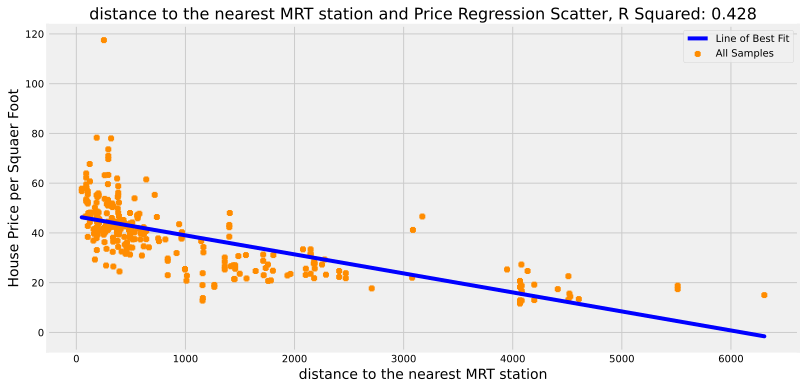

In [23]:
figure(figsize=(12, 6), dpi=80)
plt.scatter(X_train, y_train, color='darkorange', marker= '+', label= 'All Samples')
plt.plot(X_train, clf.predict(X_train.reshape(-1, 1)), color='blue', label='Line of Best Fit')
plt.grid()
plt.xlabel(predictor_variable[3:], fontsize=14)
plt.ylabel('House Price per Squaer Foot', fontsize=14)
plt.title(f'{predictor_variable[3:]} and Price Regression Scatter, R Squared: {round(r2_score(y_test, y_pred), 3)}', fontsize=16)
plt.legend()
plt.grid()

# How can we improve this model? 

- Use nonlinear regression models
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- Use other predictors in the univariate regression model!
    - Do other predictors give us a model that has a smaller mean squared error? Which predictor gives us the highest performing univariate regression model? 
- Is there any way we can better utilize the lat and long features? Could we combine these into a single feature that might help the model differentiate between nicer neighborhoods? 

In [24]:
# you write the code here! 